# COGS 108 - Final Project 

# Overview

There had been a recent fund provided by the government for funding of San Diego parks. However, out of hundreds of parks to consider, it is hard to discern which parks should be prioritized to receive the funding. As an article mentions, similar to our current society stereotype that "the richer get richer, the poorer gets poorer", the parks that are popular and in better neighborhoods are frequented more, and enjoyed more by its visitors. To enhance the qualities and refurbish the facilities of the worn down parks that people do not visit as often, the funds should be directed upgrading those parks. With the data provided and seeing the relationships between number of reviews and ratings, I was able to extract a list of parks that should be prioritized for those funds. 

# Name & GitHub ID

- Name: Gyujin Hong
- GitHub Username: gyuj

# Research Question

How will location and zip code of a park affect its popularity and satisfaction level in San Diego? Are these qualities related? How can we find out which parks will need to be prioritized for funding with data provided for those four qualities mentioned above?

## Background and Prior Work

San Diego is loved by its residents for its spacious region, proximity to the coast, and its relaxed community. An important recreational feature that is a necessity for families and individuals in this city are parks, which provide fresh air and open fields for various leisure activities. As beautiful and precious they are to the community they belong in, they do require a lot care and funds to be kept at a good presentable condition to satisfy the residents who frequent their use. However, there are more than just a few hundred parks in San Diego alone - it is difficult to discern which of them should receive the extra expenses to be refurnished. Therefore, using the dataset provided by Professor Ellis, we will visualize the data, looking for correlation between zip codes and higher ratings through yelp by users. The predicted outcome is that specific regions within the San Diego county that have higher ratings will have better furnished parks and do not need the extra funding to upgrade their facilities. 

Some background search on what has been previously done regarding this subject by *TSDF* showed that "the new report finds that the communities that historically suffer from the greatest inequities in usable green space are those with higher concentrations of lower-income households, as well as communities with greater racial and ethnic diversity." As mentioned by this article, it supports the idea that specific zip codes, which pertain to similar income-level households as well, also determine the satisfactory level that the parks provide to the surrounding residents. From this, we can see that lower-income household zip coded parks should be better funded to provide better experiences to its residents. 

This seems like an issue that has been realized by other writers and reporters as well, when seen through an article through *Voice of San Diego*, "Richer, newer San Diego neighborhoods have amassed millions in fees paid by developers used to build things like parks, roads and libraries while older and generally poorer neighborhoods collect much less."  Hopefully further analysis on concrete datasets will bring better funding to the needed communities. A part of this has taken effect, as mentioned in the foremost mentioned article by TSDF, where funding has been granted to non-profit organizations saw the need for lower-income neighborhoods to be funded. Through this research correlating the satisfactory levels with zip codes, one can see clearly the relationship between specific regions and difference in conditions of parks, and hopefully thorough funding can be executed. 

Through the research conducting with the given dataset below, we will ultimately be able identify which zip codes have parks that should come in priority for funding for its facilities through seeing which parks residents frequent the use of mostly, by identifying which parks with high number of reviews *and* high ratings are located in which zip codes.   


References (include links):
- 1) TSDF https://www.sdfoundation.org/news-events/sdf-news/the-san-diego-foundation-launches-new-parks-report-and-increases-access-to-nature-with-344990-in-grants/
- 2) Elmer, Mackenzie https://www.voiceofsandiego.org/topics/government/if-your-local-park-sucks-this-is-probably-why/ 

# Hypothesis


The parks with higher ratings will have significantly high number of reviews, as mentioned in article from above that the richer neighborhood parks get more funds, and the lower-income household neighborhood parks do not. Similar idea, the more satisfying a park is, the more residents will frequent the use of. Therefore, the zip code in the wealthier neighborhoods will be more furnished and have parks with better ratings, because residents will tend to find *nicer* parks. 

# Dataset(s)


- Dataset Name: Yelp SD Parks
- Link to the dataset: https://github.com/COGS108/individual_fa20/tree/master/data
- Number of observations: 3,332

CSV Dataset on Yelp dataset for San Diego parks, with locations and  ratings. Number of ratings taken into account are provided, and the ratings are averages. 

# Setup

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuring libraries
sns.set()
sns.set_context('talk')

In [2]:
# Reading in data
df_info = pd.read_csv('https://raw.githubusercontent.com/COGS108/individual_fa20/master/data/yelp_SD_parks.csv')

# Data Cleaning

Describe your data cleaning steps here.

In [3]:
# Drop unnecessary columns
df_info = df_info.drop(columns = ['phone', 'id', 'url', 'longitude', 'latitude', 'is_closed'])

In [4]:
# Visualize data we have so far
df_info.head()

,name,address,rating,review_count
0,Balboa Park,"1549 El Prado San Diego, CA 92101",5.0,2105
1,Civita Park,"7960 Civita Blvd San Diego, CA 92108",4.5,46
2,Waterfront Park,"1600 Pacific Hwy San Diego, CA 92101",4.5,242
3,Trolley Barn Park,"Adams Ave And Florida St San Diego, CA 92116",4.5,102
4,Bay View Park,"413 1st St Coronado, CA 92118",5.0,42


In [5]:
# Clean up address column to only include zip code
address_zipcode = pd.Series(df_info['address'])
address_zipcode = address_zipcode.str.slice(start=-5)

# New zip code column saved 
address_zipcode.head()

# Push back changes to address column in original df
df_info['address'] = address_zipcode

df_info.shape

(833, 4)

In [6]:
# Clean up ranges of review counts, exclude outliers for cleaner data visualization
df_info['review_count'].unique
df_info['review_count'].value_counts()

1       62
2       37
3       37
4       34
7       29
        ..
147      1
146      1
145      1
345      1
3051     1
Name: review_count, Length: 267, dtype: int64

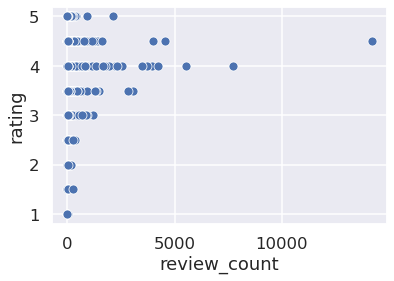

In [7]:
# Visualize results, zip code on x axis and ratings on y to see correlations

# Plot_1
sns.scatterplot(x = df_info['review_count'], y = df_info['rating'])

In [8]:
# Get an idea of up to which range to include in plot by above function, execute to dropping unnecessaries
df_info = df_info.drop(df_info.loc[df_info['review_count'] > 2000].index)

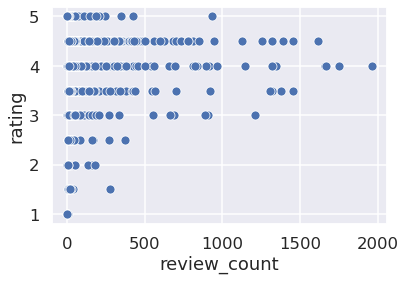

In [9]:
# Visualize results, zip code on x axis and ratings on y to see correlations

# Plot_2
sns.scatterplot(x = df_info['review_count'], y = df_info['rating'])

# Data Analysis & Results

Include cells that describe the steps in your data analysis.

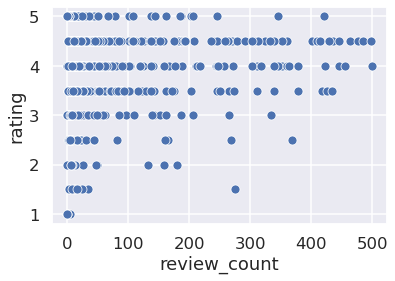

In [10]:
# Extension of steps done above;
# magnifying more upon data visualization to highlight our focus of the research: 
# finding which zip codes to direct the funds to.

# Plot_3
df_info = df_info.drop(df_info.loc[df_info['review_count'] > 500].index)
sns.scatterplot(x = df_info['review_count'], y = df_info['rating'])

In [11]:
# List of parks that should be focused for funding, with lowest ratings and reviews
df_low_rating = df_info[df_info['rating']<3]
df_low_overall = df_low_rating[df_low_rating['review_count']<100]
df_low_overall

,name,address,rating,review_count
129,Parkside Park,92139,2.5,8
134,City of Lakeside,92040,1.0,1
147,Lamar Park,91977,1.5,12
155,Sunnyslope Park,92102,1.0,1
158,MG Properties Group,92121,2.0,26
178,Memorial Park,91910,2.5,8
261,Damato Skatepark,92124,2.5,7
324,"Curtis Management Company, Inc",92008,2.0,50
338,Costa Verde Center,92122,2.5,22
355,Park Diplomat,92103,2.5,15


In [12]:
df_low_overall.shape

(48, 4)

The parks that should be prioritized for funding for refurnishing are those 48 parks above that have the lowest ratings and the number of reviews. The names of the parks are provided, and this shortened list from the previous 764 names of parks. 

The plot above supports our hypothesis that the higher rating a park gets, the more reviews, and visitors the park has. The portion of the above data is the lower left corner of the entire plot, the parks that have less than 100 reviews and less than rating points of 3. These parks are the ones that need to be focused with funds for refurnishing, and attracting more visitors of. 

As labeled, plot 1 and 2 provided a visualization that supported the idea that popular parks will have higher numbers of reviews. Through the outliers that were present before they were sliced off, we are able to note that there are *no* outliers at all where the ratings are low; for parks that had low ratings, people did not bother to post a lot of reviews of them on yelp, which can also imply that these parks were not visited as much as others. 

# Ethics & Privacy

Data gathered are solely on parks, therefore it does not pertain to any breaches on privacy issues in collecting and plotting this data publicly. The parks are out on the public for public use, and the addresses of the parks as well as the numbers are made available on the internet, accessible to anyone who has a need for them. As for the data gathered from Yelp, on the ratings made by individuals on the parks, the names of those who made the ratings were not disclosed, and no identity tags are made available through the data gathered for this research. 

The ethics that the resulting conclusion of this study is based on might have flaws - that the less popular parks will be correlated with lower-income household neighborhoods. However, the dataset just provides a visualization for which parks were both low in review counts and rating points *significantly* in comparison to the majority of other parks in the county of San Diego. 

# Conclusion & Discussion

Although the final conclusion could have been thoroughly supported with comparison against another dataset that provided the relational income level of the neighborhood with its representative zip code, that could have breached the privacy policy for the comprised zip codes. The income levels of the broad region represented by a zip code might potentially harm the residents of the zip code, and some might disagree, for income levels will vary within those regions. Some might feel wronged by the labeling of a income level for their location of residency, and lowered prices for estate owners might also not have agreed with the income level and zip code association information being publicized. 

I was able to accomplish what my research study had hoped to find - a relationship between the number of ratings for a park through Yelp in San Diego and the average of rating points by those reviews. I was able to conclude by visualizing the outliers through Plot 1 and Plot 2 that only the parks that were reviewed with a rating more than 3, at a minimum, were reviewed by a large number of reviews up to 2000. However, the parks that were rated less that 3 points out of 5 rarely had reviews more than 200, most were merged from ranges up to 100 numbers of reviews. Finallyl, I was able to extract 48 parks out of the 764 that I started with, that should be prioritized for fundings for refurnishments. 